# Supervised Learning and Loss Functions

The goal in a supervised learning task is to produce a **model** that we can use to predict the value of a label (or response) $y$ given values for a set of features (or predictors), $x^{(1)}, x^{(2)}, ..., x^{(p)}$. This model is typically represented by a **`predict()`** function. 

When we select a learning algorithm, we are effectively selecting a class of models that we will be considering for our particular task. This set of allowed models is called our **hypothesis space**. Our learning algorithm will search through the hypothesis space to find the model that performs the best on our training data. To determine what model from the hypothesis space is the "best", we need to provide the learning algorithm with a method of score different models. Such a scoring method is called an **objective function**. An objective function takes a model and a dataset as input, and produces a numerical score as its output. If an objective function is defined in such a way that lower scores are better, then we call it a **loss** function. The goal of a learning algorithm is to minimize its loss on the training data. 

We will illustrate these concepts with the **linear regression learning algorithm**. 

# Lesson 03 - Linear Regression

### The following topics are discussed in this notebook:
* Loss Functions.
* Simple Linear Regression
* Multiple Linear Regression
* Linear Regression using scikit-learn.

### Additional Resources
* [Python Data Science Handbook, Ch 2] - intro to NumPy arrays 
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Machine Learning, Ch 3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


## Linear Regresion

*In a simple linear regression task, we have a single FEATURE, `x`, from which we wish to predict a continuous, real-valued LABEL `y`.

* Assume that our training set has $n$ observations.
* Denote the observed values of the training feature (predictor) as $x_1, x_2, ..., x_n$.
* Denote the observed values of the label (response variable) as $y_1, y_2, ..., y_n$.
* We assume that our model has the following form: $\large \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$.
* In the model above, $\hat{\beta}_0$ and $\hat\beta_1$ are model parameters that are learned from the training data. 
* $\hat{y}$ represents the predicted value of $y$ given some value of $x$. 

### Training the Model

* Let $b_0$ and $b_1$ be a pair of (not necessarily optimal) parameter values used to define a model $\large \hat{y} = {b}_0 + {b}_1 x$.
* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = b_0 + b_1 x_i$. 
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors loss function, given by: $ \large SSE = \sum \hat{e}_i^2 $
* We will denote the optimal parameter values by $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [66]:
# First, let's generate some data, define some model for the data, and compute (by hand) the SSE for it...
import numpy as np
x = np.array([1, 2, 3, 4,5 ])
print(x)
print(x.shape)
y = np.array([4.9, 7.1, 9.3, 10.2, 13.5])
print(y)
print(y.shape)

X = x.reshape(len(x),1)
print(X.shape)
print(y.shape)

[1 2 3 4 5]
(5,)
[ 4.9  7.1  9.3 10.2 13.5]
(5,)
(5, 1)
(5,)


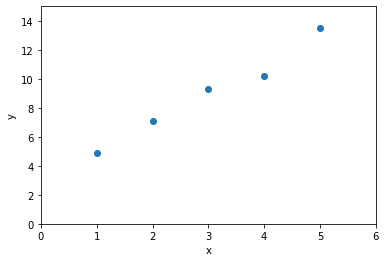

In [67]:
#before computations - let's plot the data

%matplotlib inline
#To set this up, before any plotting or import of matplotlib is performed 
#you must execute the %matplotlib magic command. 
#This performs the necessary behind-the-scenes setup for IPython 
#to work correctly hand in hand with matplotlib; it does not, however, 
#actually execute any Python import commands, that is, no names are added to the namespace.
import numpy as np
from ipywidgets import *
from IPython.display import display, HTML, Markdown
import pandas as pd
import matplotlib.pyplot as plt



plt.close()
plt.scatter(x,y)

plt.xlim([0,6])
plt.ylim([0,15])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

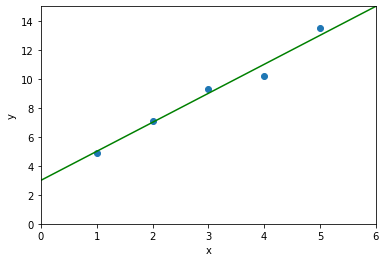

In [68]:
#It looks like the points make a line with slope equal about m=2 and y-intercept about b=3
#Let's plot   y=3+2x  wiht the data points...
b = 3
m = 2

plt.close()
plt.scatter(x,y)
plt.plot([0,6],[m*0 + b, m*6 + b], c='g')
plt.xlim([0,6])
plt.ylim([0,15])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Now spend some time computing  the SSE  and the score (called r_Squared)...    By hand!

## Computing SSE
* Let $b_0$ and $b_1$ be a pair of (not necessarily optimal) parameter values used to define a model $\large \hat{y} = {b}_0 + {b}_1 x$.
* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = b_0 + b_1 x_i$. 
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors loss function, given by: $ \large SSE = \sum \hat{e}_i^2 $

## Computing r-Squared

When working with linear regression, the optimal parameter values are determined by minimizing the objective function SSE. However, a different value is typically used to assess the quality of a regression model. This alternate scoring method is called the called the **r-squared value**. It is defined as follows:

* $ \large SST = \sum (y_i - \bar y ) ^2 $

* $ \large SSE = \sum \hat{e}_i^2 = \sum (y_i - \hat {y}_i ) ^2 $

* $ \large r^2 = 1 - \frac{SSE}{SST}$

Since SST is a constant for the supplied training data, minimizing SSE is equivalent to maximizing $r^2$. The score supplied by $r^2$ has two advantages over SSE:

1. The value $r^2$ is "normalized" to always be between 0 and 1. A value close to 1 indicates that our model provides a very good fit for the data. 
2. The $r^2$ value has a useful interpretation not present with SSE. We can think of $r^2$ as reporting the proportion of the variance in the training labels that has been accounted for by our model. 


## SLR with Scikit-Learn

Scikit-Learn is a library that contains implementations of many machine learning algorithms, as well as useful tools for evaluatting models, processing data, and generating synthetic data sets. We will use this package extensively in this class. 

In this lesson, we will illustrate how to use Scikit-Learn to construct linear regression models. 

In [69]:
#We will now use the `LinearRegression` class from Scikit-Learn to create the SLR model.
from sklearn.linear_model import LinearRegression

# We create an instance of the LinearRegression() class.
# Then we call its fit() method. 
mod = LinearRegression()
mod.fit(X,y)

# We print the model parameters. 
print('Intercept:  ', mod.intercept_)
print('Slope:', mod.coef_)

# We compute the r_Squared 
print("r-Squared is ", mod.score(X,y))

Intercept:   2.9099999999999984
Slope: [2.03]
r-Squared is  0.9765165876777251


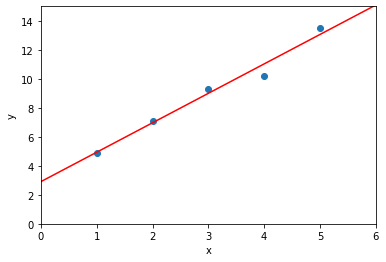

In [70]:
#Let's plot   y=b+m*3 with the model parameters we obtain from SKLEARN...
plt.close()
plt.scatter(x,y)

b = mod.intercept_
m = mod.coef_[0]
plt.plot([0,6],[m*0 + b, m*6 + b], c='r')
plt.xlim([0,6])
plt.ylim([0,15])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1]:
# Playing with a Linear Regression using a Python snippet04.py 


#With this backend, the output of plotting commands is displayed inline 
#within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document.
%matplotlib inline
%run -i snippets/snippet04.py

<Figure size 550x550 with 0 Axes>

In [72]:
### HERE WE GENERATE THE SAME DATA AS IN snippet04.py
np.random.seed(163)
x = np.random.uniform(low=0, high=10, size=12)
x.sort()
y = 5 + 1.4 * x + np.random.normal(loc=0, scale=2.5, size=12)
print ( pd.DataFrame( {'x':x,  'y':y}))


# The features (that is the data in x)  need to be stored in a 2D array or DataFrame
# that's why we reshape the one-dimnesional vector x into a 2D array X
X = x.reshape(12,1)
print(X.shape)
print(y.shape)

           x          y
0   0.271574   6.386724
1   1.658730   8.561736
2   2.362137   9.456477
3   2.926846   9.695954
4   3.430756   9.104633
5   4.482566  12.104478
6   4.486176  11.420900
7   4.740897   9.133291
8   5.728787   9.438673
9   6.889639  15.383075
10  7.772462  13.766021
11  8.102013  15.993152
(12, 1)
(12,)


In [73]:
# We create an instance of the LinearRegression() class.
# Then we call its fit() method. 
mod = LinearRegression()
mod.fit(X,y)

# We print the model parameters. 
print('Intercept:  ', mod.intercept_)
print('Slope:', mod.coef_)

Intercept:   6.209338101745086
Slope: [1.058284]


We will plot the dataset, along with the line that represents the model. 

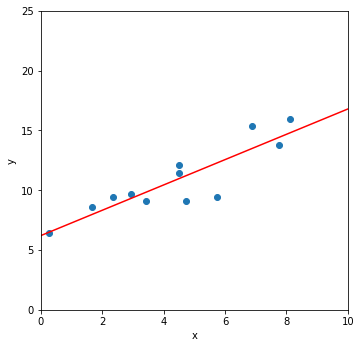

r-Squared is  0.7758984631440847


In [74]:
b = mod.intercept_
m = mod.coef_[0]

plt.close()
plt.scatter(x,y)
plt.plot([0,10],[m*0 + b, m*10 + b], c='r')
plt.xlim([0,10])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("r-Squared is ", mod.score(X,y))

## Generating Predictions

Ever Scikit-Learn model comes equipped with a `predict` method that can be used to generate predictions. We will use this method to find the `y` values predicted for our model for `x=2`, `x=5`, and `x=8`. 

In [75]:
Xnew = np.array([2, 5, 8])
print(Xnew.shape)

(3,)


The predict function requires a 2D array as input, so we will reshape `Xnew`. 

In [76]:
Xnew = Xnew.reshape((3,1))
print(Xnew.shape)

(3, 1)


In [77]:
print(mod.predict(Xnew))

[ 8.325907 11.500759 14.675612]


## Computing SSE and r_Squared using the formulas

We know that the parameter values were selected in order to minimize SSE for the given training data. Let's calculate the SSE for the model we have generated. This will require us to use the `predict` method built into our model. 


* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = b_0 + b_1 x_i$. 
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors loss function, given by: $ \large SSE = \sum \hat{e}_i^2 $

In [78]:
y_hat = mod.predict(X)
residuals = y - y_hat

SSE = np.sum(residuals**2)

print('Training SSE:', SSE)

Training SSE: 21.02398255445639


## r-Squared

When working with linear regression, the optimal parameter values are determined by minimizing the objective function SSE. However, a different value is typically used to assess the quality of a regression model. This alternate scoring method is called the called the **r-squared value**. It is defined as follows:

* $ \large SST = \sum (y_i - \bar y ) ^2 $

* $ \large SSE = \sum \hat{e}_i^2 = \sum (y_i - \hat {y}_i ) ^2 $

* $ \large r^2 = 1 - \frac{SSE}{SST}$

Since SST is a constant for the supplied training data, minimizing SSE is equivalent to maximizing $r^2$. The score supplied by $r^2$ has two advantages over SSE:

1. The value $r^2$ is "normalized" to always be between 0 and 1. A value close to 1 indicates that our model provides a very good fit for the data. 
2. The $r^2$ value has a useful interpretation not present with SSE. We can think of $r^2$ as reporting the proportion of the variance in the training labels that has been accounted for by our model. 

We will now directly compute the $r^2$ value for our model. 

In [79]:
SST = np.sum((y - np.mean(y))**2)
r2 = 1 - SSE / SST
print(r2)

0.7758984631440847



## Scoring the Model directly
Scikit-Learn `LinearRegression` objects do not have an `r_squared` attribute, but they do contain a method called `score` that can be used to calcuate $r^2$.

In [80]:
print(mod.score(X,y))

0.7758984631440847


## Multiple Regression

In a multiple linear regression task, we have several features, $X = [x^{(1)}, x^{(2)}, ..., x^{(p)}]$, from which we wish to predict a single continuous, real-valued label `y`.

* Assume that our training set has $n$ observations.
* Denote the values of the training features for observation number $i$ as $X_i = [x^{(1)}_i, x^{(2)}_i, ..., x^{(p)}_i]$.
* Denote the value of the label for observation $i$ as $y_i$. 
* We assume that our model has the following form: $\large \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x^{(1)} + \hat{\beta}_2 x^{(2)} ... + \hat{\beta}_p x^{(p)}$.
* In the model above, $\hat{\beta}_0$, $\hat{\beta}_1$, ..., $\hat{\beta}_p$ are model parameters that are learned from the training data. 
* $\hat{y}$ represents the predicted value of $y$ given some input vector $X = [x^{(1)}, x^{(2)}, ..., x^{(p)}]$. 

### Training the Model

* Let $b_0, b_1, ..., b_p$ be a set (not necessarily optimal) parameter values used to define a model $\large \hat{y} = {b}_0 + {b}_1 x^{(1)} + {b}_2 x^{(2)} + ... + {b}_p x^{(p)}$.
* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = {b}_0 + {b}_1 x^{(1)}_i + {b}_2 x^{(2)}_i + ... + {b}_p x^{(p)}_i$.
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors objective function, given by: $ \large SSE = \sum \hat{e}_i^2 $
* We will denote the optimal parameter values by $\hat{\beta}_0$, $\hat{\beta}_1$, ..., $\hat{\beta}_p$.

## Example with TWO independent variables 

We will generate a random dataset to illustrate how multiple regression works. 

In [3]:
np.random.seed(1)

n = 200
x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(0, 10, n)
y = 7 + 1.3 * x1 + 2.5 * x2 + np.random.normal(0, 3, n)

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

df.head(12)

,x1,x2,y
0,4.170220,9.501761,38.139430
1,7.203245,5.566532,30.126983
2,0.001144,9.156063,27.714854
3,3.023326,6.415662,24.366173
4,1.467559,3.900077,18.250087
5,0.923386,4.859907,17.958359
6,1.862602,6.043105,25.377172
7,3.455607,5.495479,22.752695
8,3.967675,9.261814,37.175761
9,5.388167,9.187334,39.841319


We can use the `LinearRegression` class from Scikit-Learn to create multiple regression models.

In [82]:
X = np.hstack([x1.reshape(n,1), x2.reshape(n,1)])

print(X.shape)

mlr = LinearRegression()
mlr.fit(X,y)

print('\nModel intercept:', mlr.intercept_)
print('\nModel coefficients:', mlr.coef_)
print('\nr-Squared:', mlr.score(X,y))

Xnew = np.array([4, 9])
Xnew = Xnew.reshape((1,2))
print("the y value for x1=4 and x2=9  is = ", mlr.predict(Xnew))


(200, 2)

Model intercept: 6.536812277597999

Model coefficients: [1.377376 2.506059]

r-Squared: 0.8721337623707668
the y value for x1=4 and x2=9  is =  [34.600849]


## Example: Predicting Median Home Value

In this example, we will be working with the "Boston Housing" dataset. This dataset contains data for 506 census tracts of Boston from the 1970 census. 

The dataset contains the following 19 pieces of information for each census tract:
* **`town`** - name of town
* **`tract`** - census tract
* **`lon`** - longitude of census tract
* **`lat`** - latitude of census tract 
* **`medv`** - median value of owner-occupied homes in USD 1000's
* **`cmedv`** - corrected median value of owner-occupied homes in USD 1000's
* **`crim`** - per capita crime rate by town
* **`zn`** - proportion of residential land zoned for lots over 25,000 sq.ft
* **`indus`** - proportion of non-retail business acres per town
* **`chas`** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **`nox`** - nitric oxides concentration (parts per 10 million)
* **`rm`** - average number of rooms per dwelling
* **`age`** - proportion of owner-occupied units built prior to 1940
* **`dis`** - weighted distances to five Boston employment centres
* **`rad`** - index of accessibility to radial highways
* **`tax`** - full-value property-tax rate per USD 10,000
* **`ptratio`** - pupil-teacher ratio by town
* **`b`** - 1000(B - 0.63)^2 where B is the proportion of blacks by town
* **`lstat`** - percentage of lower status of the population

We will start by importing the dataset from a text file, and then viewing the first 10 rows.

In [83]:
df = pd.read_csv('data/BostonHousingV2.txt', sep='\t')
df.head(5)

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,Nahant,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Let's check the dimensions of the DataFrame.

In [84]:
print(df.shape)
print(df.head(5))

(506, 19)
         town  tract     lon      lat  medv  cmedv     crim    zn  indus  \
0      Nahant   2011 -70.955  42.2550  24.0   24.0  0.00632  18.0   2.31   
1  Swampscott   2021 -70.950  42.2875  21.6   21.6  0.02731   0.0   7.07   
2  Swampscott   2022 -70.936  42.2830  34.7   34.7  0.02729   0.0   7.07   
3  Marblehead   2031 -70.928  42.2930  33.4   33.4  0.03237   0.0   2.18   
4  Marblehead   2032 -70.922  42.2980  36.2   36.2  0.06905   0.0   2.18   

   chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat  
0     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  
1     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  
2     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  
3     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  
4     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  


We will use this dataset for a regression task in which we will attempt to predict the label `cmedv` using the last 13 columns as features. We will now prepare our feature and label arrays. 

In [85]:
X = df.iloc[:,6:].values
y = df.iloc[:,5].values

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In order to measure how well our model generalizes to new data, we will create a train/test split of our data.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


We will now use the `LinearRegression` class to create our model. We will use the `score` method of our trained model to calculate the r-Squared value on our training set, as well as on our test set. 

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training r-Squared:", model.score(X_train, y_train))
print("Testing r-Squared: ", model.score(X_test, y_test))

Training r-Squared: 0.7341832055169144
Testing r-Squared:  0.763957915736643


The model object has attributes containing the optimal parameter values that define our model.

In [88]:
np.set_printoptions(precision=6, suppress=True)

print(model.intercept_)
print(model.coef_)



42.76113154507837
[ -0.110315   0.06       0.021576   2.134697 -19.522247   3.075544
   0.004304  -1.536018   0.303108  -0.011639  -0.950799   0.0072
  -0.551868]


## Using a Subset of the Available Features

It is often undesireable to use all features that are potentially available to you in a supervised learning task. A few reasons why you might want to consider using a subset of the available features are:

* Using too many features could result in over-fitting. 
* Some features might not be relevant.
* Some features might be redundant. 
* Having too many features can have a negative impact on the interpretability of your model. 
* It might be expensive or time-consuming to collect values for certain features. 

Let train a second MLR model on this data, but this time using only the features `rm`, `ptratio`, and `lstat`. 

In [89]:
df.iloc[:, [11,16,18]].head()

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [90]:
Xs = df.iloc[:,[11,16,18]].values

print(Xs.shape)

(506, 3)


In [91]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=1)

In [92]:
model_s = LinearRegression()
model_s.fit(Xs_train, y_train)

print("Training r-Squared:", model_s.score(Xs_train, y_train))
print("Testing r-Squared: ", model_s.score(Xs_test, y_test))

Training r-Squared: 0.6739085856095928
Testing r-Squared:  0.6958714532115466


Note that both r-Squared values are LOWER than those computed previously (when we used the last 13 columns).  Since the Testing r-squared value given above is LOWER than the Testing r-squared value with 13 columns - we will keep the former model...

In [93]:
print(model_s.intercept_)
print(model_s.coef_)

23.927244156450747
[ 3.795969 -0.952999 -0.597414]
